In [5]:
from control import *
import numpy as np
import matplotlib.pyplot as plt
## Using BS data for reference.
K=1000
r_L = (996+230) /1000  # length from optic to lens
r_P = (996+120+185) / 1000  # length from optic to tilt QPD
alpha = 36.9 * np.pi/180
beta = 0
r_Y = r_P * np.cos(alpha) 
theta_tilt = 2.154 * np.pi/180
theta_len = -3.09 * np.pi/180
delta_P = -0.14
delta_Y = 0.02494
f = 300/1000
C_Tx=0.004063
C_Ty=0.004534
C_Lx=0.002451
C_Ly=0.002471
def OL2EUL(r_L=r_L, r_P=r_P, r_Y=r_Y, 
           theta_tilt=theta_tilt, theta_len=theta_len, 
           alpha=alpha, beta=beta, 
           delta_Y=delta_Y, delta_P=delta_P, f=f):
    A = np.array(
            [
                [2*np.sin(beta), 2*delta_P*np.sin(beta), 2*r_Y+2*delta_Y*np.sin(beta)],
                [2*np.sin(alpha), 2*r_P+2*delta_P*np.sin(alpha), 2*delta_Y*np.sin(alpha)],
                [-2*f*np.sin(alpha)/(r_L-f), -2*delta_P*f*np.sin(alpha)/(r_L-f), -2*delta_Y*f*np.sin(alpha)/(r_L-f)]
            ])
    R = np.array(
            [
                [np.cos(theta_tilt), np.sin(theta_tilt), 0, 0],
                [-np.sin(theta_tilt), np.cos(theta_tilt), 0, 0],
                [0, 0, -np.sin(theta_len), np.cos(theta_len)]
            ]
        )
#     cal = np.array(
#             [
#                 [C_Tx, 0, 0, 0],
#                 [0, C_Ty, 0, 0],
#                 [0, 0, C_Lx, 0],
#                 [0, 0, 0, C_Ly]
#             ]
#         )
    return(np.matmul(np.linalg.inv(A), R))

# OL2EUL()[:,0], OL2EUL()[:, 2] = OL2EUL()[:, 2], OL2EUL()[:, 0].copy
# OL2EUL()[:,1], OL2EUL()[:, 3] = OL2EUL()[:, 1], OL2EUL()[:, 3].copy
# A=OL2EUL()
# # A[:,0], A[:, 2] = A[:, 2], np.copy(A[:, 0])
# # A[:,1], A[:, 3] = A[:, 3], np.copy(A[:, 1])
# A[:,0], A[:, 1] = A[:, 1], np.copy(A[:, 0])
# A[:,2], A[:, 3] = A[:, 3], np.copy(A[:, 2])
# A=A*1000
# A
# cal=np.matrix([[C_Ty,0,0,0],[0,C_Tx,0,0],[0,0,C_Ly,0],[0,0,0,C_Lx]])

# rot=K*np.matrix([[np.sin(theta_tilt),np.cos(theta_tilt),0,0],[np.cos(theta_tilt),-np.sin(theta_tilt),0,0],[0,0,np.cos(theta_len),-np.sin(theta_len)]])
# arm=np.matrix([[2*np.sin(beta),2*delta_P*np.sin(beta),2*r_Y+2*delta_Y*np.sin(beta)],[2*np.sin(alpha),2*r_P+2*delta_P*np.sin(alpha),2*delta_Y*np.sin(alpha)],[(-2*f*np.sin(alpha)/(r_L-f)),(-2*f*np.sin(alpha)/(r_L-f))*delta_P,(-2*f*np.sin(alpha)/(r_L-f))*delta_Y]])
# print(arm.I*rot*cal)
# print(np.linalg.pinv(OL2EUL()))
def LPY2QPD(L, P, Y):
    X = np.array([[L],[P],[Y]])
    return(np.matmul(np.linalg.pinv(OL2EUL()), X))



In [3]:
np.matmul(OL2EUL(),LPY2QPD(1,0,0))

array([[ 1.00000000e+00],
       [-5.85902854e-16],
       [-5.89805982e-17]])

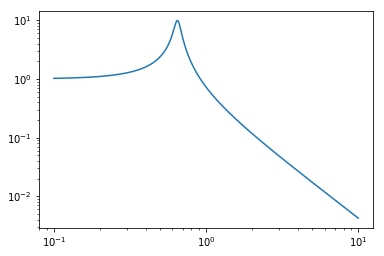

In [6]:
f = np.linspace(0.1,10,1000)
L_tf = tf([(0.65*2*np.pi)**2],[1,0.65*2*np.pi/10,(0.65*2*np.pi)**2])
plt.loglog(f, abs(L_tf.horner(2*np.pi*f*1j)[0][0]))